In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
import math
import impyute as impy
import statsmodels.api as sm
from datetime import datetime
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [26]:
cleaned_dataset = pd.read_csv('my_cleaned_dataset.csv')

In [27]:
cleaned_dataset.tail(10)

,Unnamed: 0,continent,location,date,new_cases,new_deaths,icu_patients,new_tests,positive_rate,people_vaccinated,new_vaccinations,total_boosters,stringency_index,population,population_density,cardiovasc_death_rate,diabetes_prevalence,human_development_index
15051,116644,North America,United States,2021-10-23,26311.0,438.0,14961.0,1059610.0,0.052,220091872.0,763021.0,14335519.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15052,116645,North America,United States,2021-10-24,16315.0,152.0,14718.0,592006.0,0.052,220204012.0,437739.0,14588729.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15053,116646,North America,United States,2021-10-25,104829.0,1403.0,14912.0,866596.0,0.053,220516303.0,437739.0,15470456.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15054,116647,North America,United States,2021-10-26,79971.0,1539.0,14853.0,1171550.0,0.056,220816501.0,1359694.0,16363933.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15055,116648,North America,United States,2021-10-27,99694.0,2492.0,14700.0,1048707.0,0.063,221111334.0,1358113.0,17263827.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15056,116649,North America,United States,2021-10-28,78128.0,1776.0,14415.0,593828.0,0.063,221382705.0,1251085.0,18091032.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15057,116650,North America,United States,2021-10-29,97361.0,1656.0,12461.0,NaN,NaN,221657885.0,1246992.0,18903738.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15058,116651,North America,United States,2021-10-30,29302.0,291.0,12243.0,NaN,NaN,221749785.0,368732.0,19128756.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15059,116652,North America,United States,2021-10-31,17599.0,164.0,12148.0,NaN,NaN,221760691.0,30005.0,19142081.0,NaN,332915074.0,35.608,151.089,10.79,0.926
15060,116653,North America,United States,2021-11-01,121139.0,1201.0,11927.0,NaN,NaN,221760691.0,0.0,19142081.0,NaN,332915074.0,35.608,151.089,10.79,0.926


In [28]:
cleaned_dataset.columns

Index(['Unnamed: 0', 'continent', 'location', 'date', 'new_cases',
       'new_deaths', 'icu_patients', 'new_tests', 'positive_rate',
       'people_vaccinated', 'new_vaccinations', 'total_boosters',
       'stringency_index', 'population', 'population_density',
       'cardiovasc_death_rate', 'diabetes_prevalence',
       'human_development_index'],
      dtype='object')

In [29]:
# cleaned_dataset =cleaned_dataset[cleaned_dataset["location"] == "France"]
dataset = cleaned_dataset[["date", "location",'new_cases','stringency_index','icu_patients',  "new_deaths",'people_vaccinated','population', 'human_development_index','diabetes_prevalence', 'positive_rate']]
# Merg: 'population', 'diabetes_prevalence','human_development_index', 'new_cases','icu_patients','people_vaccinated','stringency_index'
# Strca: population_density, 'cardiovasc_death_rate'
# Nu merg: 'new_vaccinations', 'new_tests' , 'total_boosters'

dataset['location'] = dataset['location'].astype('category')
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.set_index('date', inplace=True)
dataset

C:\Users\User\AppData\Local\Temp/ipykernel_17068/2449395631.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['location'] = dataset['location'].astype('category')
C:\Users\User\AppData\Local\Temp/ipykernel_17068/2449395631.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = pd.to_datetime(dataset['date'])


,location,new_cases,stringency_index,icu_patients,new_deaths,people_vaccinated,population,human_development_index,diabetes_prevalence,positive_rate
date,,,,,,,,,,
2020-02-25,Austria,2.0,11.11,NaN,NaN,NaN,9043072.0,0.922,6.35,NaN
2020-02-26,Austria,0.0,11.11,NaN,NaN,NaN,9043072.0,0.922,6.35,NaN
2020-02-27,Austria,1.0,11.11,NaN,NaN,NaN,9043072.0,0.922,6.35,NaN
2020-02-28,Austria,0.0,11.11,NaN,NaN,NaN,9043072.0,0.922,6.35,NaN
2020-02-29,Austria,6.0,11.11,NaN,NaN,NaN,9043072.0,0.922,6.35,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-10-28,United States,78128.0,56.02,14415.0,1776.0,221382705.0,332915074.0,0.926,10.79,0.063
2021-10-29,United States,97361.0,56.02,12461.0,1656.0,221657885.0,332915074.0,0.926,10.79,NaN
2021-10-30,United States,29302.0,56.02,12243.0,291.0,221749785.0,332915074.0,0.926,10.79,NaN


In [30]:
dummies = pd.get_dummies(dataset.location, prefix = "l_", drop_first = True)
dataset = pd.concat([dataset, dummies], axis = 1)
dataset.drop_duplicates(inplace = True)

In [31]:
df_list = [d for _, d in dataset.groupby(['location'])]
for x in range(24):
    df_list[x]['new_deaths_lag1'] = df_list[x]['new_deaths'].shift(1)
    df_list[x]['new_deaths_lag2'] = df_list[x]['new_deaths'].shift(2)
    df_list[x]['new_deaths_lag3'] = df_list[x]['new_deaths'].shift(3)

    df_list[x] = df_list[x].dropna()
data = pd.concat(df_list)
data.head(50)
data.corr()

,new_cases,stringency_index,icu_patients,new_deaths,people_vaccinated,population,human_development_index,diabetes_prevalence,positive_rate,l__Belgium,...,l__Serbia,l__Slovenia,l__Spain,l__Sweden,l__Switzerland,l__United Kingdom,l__United States,new_deaths_lag1,new_deaths_lag2,new_deaths_lag3
new_cases,1.000000,0.133883,0.902785,0.860435,0.498265,0.746408,0.093187,0.269321,0.131716,-0.049235,...,-0.044908,-0.061813,0.013974,-0.049325,-0.057512,0.105372,0.728233,0.818467,0.772414,0.750142
stringency_index,0.133883,1.000000,0.190362,0.210319,-0.010319,0.152285,0.110204,0.063997,0.164962,-0.020875,...,-0.132807,-0.057611,0.032971,-0.028499,-0.066441,0.055759,0.045067,0.211318,0.212711,0.214409
icu_patients,0.902785,0.190362,1.000000,0.867527,0.597867,0.845219,0.090588,0.342032,0.124238,-0.051407,...,-0.064290,-0.067803,0.038747,-0.062557,-0.063412,-0.010052,0.825047,0.862605,0.858417,0.855711
new_deaths,0.860435,0.210319,0.867527,1.000000,0.402181,0.724687,0.066949,0.289647,0.120916,-0.051365,...,-0.051007,-0.059462,-0.000644,-0.053168,-0.056516,0.045154,0.708700,0.921610,0.833763,0.790755
people_vaccinated,0.498265,-0.010319,0.597867,0.402181,1.000000,0.844092,0.139303,0.286579,-0.066113,-0.055774,...,-0.070162,-0.080901,0.033088,-0.060940,-0.067967,0.138229,0.789859,0.400549,0.396337,0.394135
population,0.746408,0.152285,0.845219,0.724687,0.844092,1.000000,0.142420,0.360962,0.007058,-0.068400,...,-0.081282,-0.097544,0.037427,-0.072738,-0.078709,0.101562,0.935472,0.724777,0.724208,0.724271
human_development_index,0.093187,0.110204,0.090588,0.066949,0.139303,0.142420,1.000000,-0.469705,-0.237853,0.124237,...,-0.507927,0.052514,-0.014012,0.195711,0.252031,0.127334,0.101796,0.067474,0.067974,0.068523
diabetes_prevalence,0.269321,0.063997,0.342032,0.289647,0.286579,0.360962,-0.469705,1.000000,0.147696,-0.221305,...,0.330808,0.064069,0.055265,-0.172818,-0.097839,-0.218776,0.418292,0.289080,0.288016,0.287323
positive_rate,0.131716,0.164962,0.124238,0.120916,-0.066113,0.007058,-0.237853,0.147696,1.000000,-0.020040,...,0.352649,0.357345,0.043012,0.057475,0.012168,-0.113325,0.029844,0.118056,0.116064,0.113855
l__Belgium,-0.049235,-0.020875,-0.051407,-0.051365,-0.055774,-0.068400,0.124237,-0.221305,-0.020040,1.000000,...,-0.043510,-0.044361,-0.043510,-0.044207,-0.045123,-0.043588,-0.045724,-0.051376,-0.051303,-0.051338


In [32]:

x_train = list()
y_train = list()
x_test = list()
y_test = list()
df_list = [d for _, d in data.groupby(['location'])]

# 'icu_patients', 'new_tests', 'positive_rate','people_vaccinated', 'new_vaccinations', 'total_boosters', 'stringency_index','
for x in range(24):
    X = df_list[x][['population','stringency_index','icu_patients','new_cases','people_vaccinated','positive_rate', 'human_development_index','diabetes_prevalence','new_deaths_lag1', 'new_deaths_lag2', 'new_deaths_lag3']]
    y = df_list[x]['new_deaths']
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=0, shuffle = False)
    x_train.append(xtrain)
    x_test.append(xtest)
    y_train.append(ytrain)
    y_test.append(ytest)
x_train_merged = pd.concat(x_train)
x_test_merged = pd.concat(x_test)
y_train_merged = pd.concat(y_train)
y_test_merged = pd.concat(y_test)
new_x_train_merged = x_train_merged[['population','stringency_index','new_cases','icu_patients','people_vaccinated','positive_rate','human_development_index','diabetes_prevalence','new_deaths_lag1',  'new_deaths_lag2', 'new_deaths_lag3']]
new_x_test_merged = x_test_merged[['population','stringency_index','new_cases','icu_patients','people_vaccinated','positive_rate','human_development_index','diabetes_prevalence','new_deaths_lag1', 'new_deaths_lag2', 'new_deaths_lag3']]

In [33]:
rfr = RandomForestRegressor(n_estimators = 230, random_state=42)
rfr.fit(X = new_x_train_merged, y = y_train_merged)
test_fcst = rfr.predict(new_x_test_merged)

print(("Accuracy: {:.2f} %").format(rfr.score(new_x_test_merged, y_test_merged)*100))

Accuracy: 86.91 %


In [34]:
y_test_merged.view()
new_index = y_test_merged.index
s = pd.Series(test_fcst)
s.index = new_index
s.size

1431

In [35]:
# py.plot(y_test_merged, label='Expected')
# py.plot(s, label='Predicted')
# py.legend()
# py.show()

In [36]:
print("Actual   Predicted")
for i in range(100):
	print(("   {}         {}").format(round(y_test_merged[i]), round(s[i])))

Actual   Predicted
   3         4
   3         3
   7         4
   5         6
   3         6
   8         5
   8         7
   3         7
   7         6
   10         8
   5         8
   2         7
   1         5
   9         4
   7         7
   14         8
   12         12
   7         11
   6         10
   1         9
   1         6
   15         10
   10         14
   10         13
   8         11
   8         9
   7         9
   10         9
   12         9
   11         10
   5         10
   7         9
   5         9
   8         7
   15         9
   12         10
   11         11
   12         11
   6         11
   6         9
   10         9
   14         9
   15         11
   8         12
   8         9
   10         9
   6         10
   13         9
   16         11
   13         13
   11         12
   13         11
   12         12
   6         11
   6         7
   6         18
   6         6
   0         2
   0         1
   14         2
   6         7
   2         8
   1

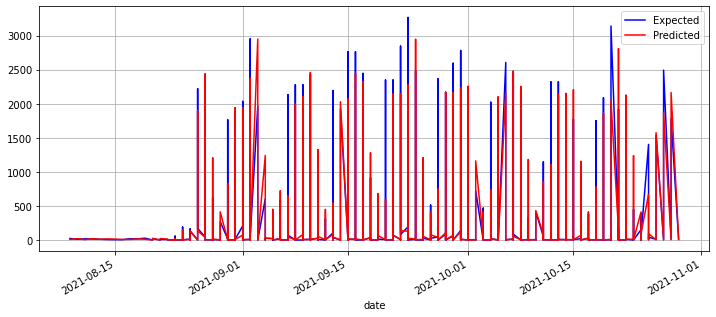

In [37]:
py.figure(figsize=(12,5))
py.xlabel('Number of new_cases')

ax1 = y_test_merged.plot(color='blue', grid=True, label='Expected')
ax2 = s.plot(color='red', grid=True,  label='Predicted')


py.legend()
py.show()

In [38]:
new_series = pd.Series(); 
for x in y_test_merged.index:
    values = y_test_merged[y_test_merged.index==pd.to_datetime(x)].values
    mean = np.mean(values)
    new_series.loc[x] = mean


C:\Users\User\AppData\Local\Temp/ipykernel_17068/4016715686.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_series = pd.Series();


In [39]:
new_s_series = pd.Series(); 
for x in s.index:
    values = s[s.index==pd.to_datetime(x)].values
    mean = np.mean(values)
    new_s_series.loc[x] = mean

C:\Users\User\AppData\Local\Temp/ipykernel_17068/84853224.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_s_series = pd.Series();


In [40]:
# estimators = np.arange(10, 500, 10)
# scores = []
# for n in estimators:
#     rfr.set_params(n_estimators=n)
#     rfr.fit(X = new_x_train_merged, y = y_train_merged)
#     scores.append(rfr.score(new_x_test_merged, y_test_merged))
# py.title("Effect of n_estimators")
# py.xlabel("n_estimator")
# py.ylabel("score")
# py.plot(estimators, scores)

Score after we average all the predictions for every country and averaged all the expected values for every country

In [41]:
test_r2 = r2_score(new_series.values, new_s_series.values)
test_r2

0.8857069421878387

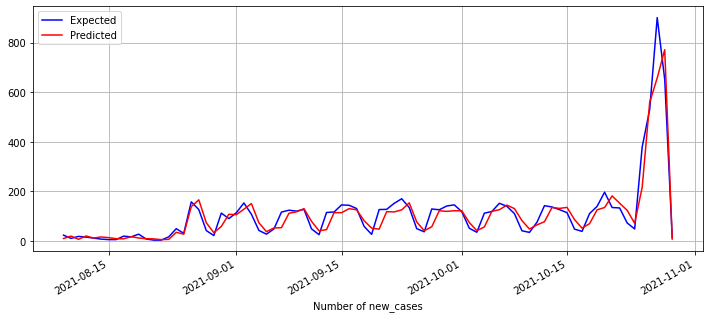

In [42]:
py.figure(figsize=(12,5))
py.xlabel('Number of new_cases')

ax1 = new_series.plot(color='blue', grid=True, label='Expected')
ax2 = new_s_series.plot(color='red', grid=True,  label='Predicted')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


py.legend()
py.show()

In [43]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [10,20,30,40,50,60,70,80,90,100,110,130,150,170,200,230, 250]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 130, 150, 170, 200, 230, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = None, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X = new_x_train_merged, y = y_train_merged)
rf_random.best_params_


{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [45]:
base_model = RandomForestRegressor(n_estimators = 9, random_state = 42)
base_model.fit(X = new_x_train_merged, y = y_train_merged)
predictions = base_model.predict(new_x_test_merged)
base_accuracy = base_model.score(new_x_test_merged, y_test_merged)
base_accuracy

0.8533147943594829

In [46]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [9, 100, 200, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [47]:
# Fit the grid search to the data
grid_search.fit(new_x_train_merged, y_train_merged)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 9}

In [48]:
best_grid = grid_search.best_estimator_
grid_accuracy = best_grid.score(new_x_test_merged, y_test_merged)
grid_accuracy

0.8475240569042993